In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read Data


In [2]:
data = pd.read_csv("csvs/p.csv", index_col=0, low_memory=False)
data


start_time             end_time  start_station_id  \
0       2018-01-01 00:24:00  2018-01-01 00:42:00              3124   
1       2018-01-01 00:38:00  2018-01-01 10:10:00              3023   
2       2018-01-01 00:48:00  2018-01-01 01:10:00              3026   
3       2018-01-01 01:03:00  2018-01-01 01:24:00              3045   
4       2018-01-01 01:05:00  2018-01-01 01:09:00              3115   
...                     ...                  ...               ...   
671813  2018-12-31 23:18:00  2019-01-01 00:04:00              3037   
671814  2018-12-31 23:25:00  2019-01-01 00:06:00              3168   
671815  2018-12-31 23:26:00  2019-01-01 06:44:00              3026   
671816  2018-12-31 23:33:00  2018-12-31 23:47:00              3063   
671817  2018-12-31 23:39:00  2018-12-31 23:49:00              3007   

        end_station_id  bike_id  user_type              start_station_name  \
0                 3073     3708   Indego30                Race Street Pier   
1                 3066     3288  Indego365              Rittenhouse Square   
2                 3023    11735   Indego30                     2nd & South   
3                 3037     5202   Indego30                   13th & Locust   
4                 3058     5142   Indego30             19th & Girard, PTTI   
...                ...      ...        ...                             ...   
671813            3037    14519   Day Pass  Pennsylvania Convention Center   
671814            3168    11891   Indego30                   20th & Sansom   
671815            3026     5410   Indego30                     2nd & South   
671816            3150     2701   Day Pass                     17th & Pine   
671817            3049     3471   Indego30          11th & Pine, Kahn Park   

                             end_station_name  
0                         9th & Spring Garden  
1                              19th & Lombard  
2                          Rittenhouse Square  
3              Pennsylvania Convention Center  
4                            20th & Fairmount  
...                                       ...  
671813         Pennsylvania Convention Center  
671814                          20th & Sansom  
671815                            2nd & South  
671816  15th & Castle, DiSilvestro Playground  
671817                        Foglietta Plaza  

[668591 rows x 8 columns]

In [3]:
data = data.drop(['start_station_id'], axis=1)
data = data.drop(['bike_id'], axis=1)
data = data.drop(['user_type'], axis=1)
data = data.drop(['start_station_name'], axis=1)
data = data.drop(['end_station_name'], axis=1)
data = data.drop(['end_station_id'], axis=1)

data


start_time             end_time
0       2018-01-01 00:24:00  2018-01-01 00:42:00
1       2018-01-01 00:38:00  2018-01-01 10:10:00
2       2018-01-01 00:48:00  2018-01-01 01:10:00
3       2018-01-01 01:03:00  2018-01-01 01:24:00
4       2018-01-01 01:05:00  2018-01-01 01:09:00
...                     ...                  ...
671813  2018-12-31 23:18:00  2019-01-01 00:04:00
671814  2018-12-31 23:25:00  2019-01-01 00:06:00
671815  2018-12-31 23:26:00  2019-01-01 06:44:00
671816  2018-12-31 23:33:00  2018-12-31 23:47:00
671817  2018-12-31 23:39:00  2018-12-31 23:49:00

[668591 rows x 2 columns]

In [4]:
data['start_time'] = pd.to_datetime(data['start_time'], errors='coerce')
data['end_time'] = pd.to_datetime(data['end_time'], errors='coerce')

data['dayofweek_start'] = data.start_time.dt.dayofweek
data['dayofweek_end'] = data.end_time.dt.dayofweek

data['month_start'] = data.start_time.dt.month
data['month_end'] = data.end_time.dt.month

data['time_start'] = data.start_time.dt.time
data['time_end'] = data.end_time.dt.time

data["start_hour"] = data.start_time.dt.hour

data['duration'] = data.end_time - data.start_time

data['duration_minutes'] = data.duration.apply(
    lambda x: pd.Timedelta(x).total_seconds()/60)

data


start_time            end_time  dayofweek_start  \
0      2018-01-01 00:24:00 2018-01-01 00:42:00                0   
1      2018-01-01 00:38:00 2018-01-01 10:10:00                0   
2      2018-01-01 00:48:00 2018-01-01 01:10:00                0   
3      2018-01-01 01:03:00 2018-01-01 01:24:00                0   
4      2018-01-01 01:05:00 2018-01-01 01:09:00                0   
...                    ...                 ...              ...   
671813 2018-12-31 23:18:00 2019-01-01 00:04:00                0   
671814 2018-12-31 23:25:00 2019-01-01 00:06:00                0   
671815 2018-12-31 23:26:00 2019-01-01 06:44:00                0   
671816 2018-12-31 23:33:00 2018-12-31 23:47:00                0   
671817 2018-12-31 23:39:00 2018-12-31 23:49:00                0   

        dayofweek_end  month_start  month_end time_start  time_end  \
0                   0            1          1   00:24:00  00:42:00   
1                   0            1          1   00:38:00  10:10:00   
2                   0            1          1   00:48:00  01:10:00   
3                   0            1          1   01:03:00  01:24:00   
4                   0            1          1   01:05:00  01:09:00   
...               ...          ...        ...        ...       ...   
671813              1           12          1   23:18:00  00:04:00   
671814              1           12          1   23:25:00  00:06:00   
671815              1           12          1   23:26:00  06:44:00   
671816              0           12         12   23:33:00  23:47:00   
671817              0           12         12   23:39:00  23:49:00   

        start_hour        duration  duration_minutes  
0                0 0 days 00:18:00              18.0  
1                0 0 days 09:32:00             572.0  
2                0 0 days 00:22:00              22.0  
3                1 0 days 00:21:00              21.0  
4                1 0 days 00:04:00               4.0  
...            ...             ...               ...  
671813          23 0 days 00:46:00              46.0  
671814          23 0 days 00:41:00              41.0  
671815          23 0 days 07:18:00             438.0  
671816          23 0 days 00:14:00              14.0  
671817          23 0 days 00:10:00              10.0  

[668591 rows x 11 columns]

In [5]:
data_start_hours = data.drop(['dayofweek_start'], axis=1)
data_start_hours = data_start_hours.drop(['dayofweek_end'], axis=1)


In [6]:
# replace integer values for days/months with strings, so graph are more readable
mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday",
           3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
data = data.replace({"dayofweek_start": mapping})
day_order = ["Monday", "Tuesday", "Wednesday",
             "Thursday", "Friday", "Saturday", "Sunday"]
mapping = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
           7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
data = data.replace({"month_start": mapping})
month_order = ["Jan", "Feb", "Mar", "Apr", "May",
               "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
data


start_time            end_time dayofweek_start  dayofweek_end  \
0      2018-01-01 00:24:00 2018-01-01 00:42:00          Monday              0   
1      2018-01-01 00:38:00 2018-01-01 10:10:00          Monday              0   
2      2018-01-01 00:48:00 2018-01-01 01:10:00          Monday              0   
3      2018-01-01 01:03:00 2018-01-01 01:24:00          Monday              0   
4      2018-01-01 01:05:00 2018-01-01 01:09:00          Monday              0   
...                    ...                 ...             ...            ...   
671813 2018-12-31 23:18:00 2019-01-01 00:04:00          Monday              1   
671814 2018-12-31 23:25:00 2019-01-01 00:06:00          Monday              1   
671815 2018-12-31 23:26:00 2019-01-01 06:44:00          Monday              1   
671816 2018-12-31 23:33:00 2018-12-31 23:47:00          Monday              0   
671817 2018-12-31 23:39:00 2018-12-31 23:49:00          Monday              0   

       month_start  month_end time_start  time_end  start_hour  \
0              Jan          1   00:24:00  00:42:00           0   
1              Jan          1   00:38:00  10:10:00           0   
2              Jan          1   00:48:00  01:10:00           0   
3              Jan          1   01:03:00  01:24:00           1   
4              Jan          1   01:05:00  01:09:00           1   
...            ...        ...        ...       ...         ...   
671813         Dec          1   23:18:00  00:04:00          23   
671814         Dec          1   23:25:00  00:06:00          23   
671815         Dec          1   23:26:00  06:44:00          23   
671816         Dec         12   23:33:00  23:47:00          23   
671817         Dec         12   23:39:00  23:49:00          23   

              duration  duration_minutes  
0      0 days 00:18:00              18.0  
1      0 days 09:32:00             572.0  
2      0 days 00:22:00              22.0  
3      0 days 00:21:00              21.0  
4      0 days 00:04:00               4.0  
...                ...               ...  
671813 0 days 00:46:00              46.0  
671814 0 days 00:41:00              41.0  
671815 0 days 07:18:00             438.0  
671816 0 days 00:14:00              14.0  
671817 0 days 00:10:00              10.0  

[668591 rows x 11 columns]

# Hourly repartition


In [7]:

data_start_hours.groupby("start_hour").describe()


month_start                                                \
                 count      mean       std  min  25%  50%  75%   max   
start_hour                                                             
0               6475.0  6.889266  2.797943  1.0  5.0  7.0  9.0  12.0   
1               4080.0  6.980637  2.781734  1.0  5.0  7.0  9.0  12.0   
2               2744.0  7.068878  2.716793  1.0  5.0  7.0  9.0  12.0   
3               1319.0  7.186505  2.702233  1.0  5.0  8.0  9.0  12.0   
4               1755.0  7.140741  2.767526  1.0  5.0  7.0  9.0  12.0   
5               6705.0  6.971365  2.845843  1.0  5.0  7.0  9.0  12.0   
6              17032.0  6.899601  2.975447  1.0  5.0  7.0  9.0  12.0   
7              33755.0  6.876285  2.987151  1.0  5.0  7.0  9.0  12.0   
8              55902.0  6.827877  3.005567  1.0  5.0  7.0  9.0  12.0   
9              34404.0  6.764737  2.984948  1.0  5.0  7.0  9.0  12.0   
10             27568.0  6.887079  2.927421  1.0  5.0  7.0  9.0  12.0   
11             30303.0  6.932383  2.925699  1.0  5.0  7.0  9.0  12.0   
12             34902.0  6.904132  2.917719  1.0  5.0  7.0  9.0  12.0   
13             35387.0  6.902733  2.935800  1.0  5.0  7.0  9.0  12.0   
14             36661.0  6.852950  2.940176  1.0  5.0  7.0  9.0  12.0   
15             40866.0  6.872045  2.971853  1.0  5.0  7.0  9.0  12.0   
16             51222.0  6.834251  2.959264  1.0  5.0  7.0  9.0  12.0   
17             72577.0  6.758298  2.925148  1.0  5.0  7.0  9.0  12.0   
18             55410.0  6.765097  2.892225  1.0  5.0  7.0  9.0  12.0   
19             41979.0  6.794731  2.823328  1.0  5.0  7.0  9.0  12.0   
20             30051.0  6.811421  2.802663  1.0  5.0  7.0  9.0  12.0   
21             21373.0  6.812427  2.782504  1.0  5.0  7.0  9.0  12.0   
22             15402.0  6.882807  2.814337  1.0  5.0  7.0  9.0  12.0   
23             10719.0  6.867805  2.790196  1.0  5.0  7.0  9.0  12.0   

           month_end            ...         duration                   \
               count      mean  ...              75%              max   
start_hour                      ...                                     
0             6475.0  6.889266  ...  0 days 00:22:00  4 days 16:22:00   
1             4080.0  6.980637  ...  0 days 00:23:00  2 days 05:58:00   
2             2744.0  7.068878  ...  0 days 00:27:00  2 days 09:21:00   
3             1319.0  7.186505  ...  0 days 00:27:00  2 days 03:20:00   
4             1755.0  7.134473  ...  0 days 00:17:00  2 days 06:42:00   
5             6705.0  6.971514  ...  0 days 00:13:00  2 days 18:24:00   
6            17032.0  6.899601  ...  0 days 00:14:00  4 days 10:40:00   
7            33755.0  6.876285  ...  0 days 00:15:00  2 days 00:59:00   
8            55902.0  6.827877  ...  0 days 00:15:00  3 days 04:19:00   
9            34404.0  6.764766  ...  0 days 00:16:00  3 days 08:32:00   
10           27568.0  6.886716  ...  0 days 00:19:00  4 days 23:45:00   
11           30303.0  6.932449  ...  0 days 00:20:00  5 days 05:51:00   
12           34902.0  6.903845  ...  0 days 00:22:00  5 days 00:35:00   
13           35387.0  6.902817  ...  0 days 00:22:00  4 days 17:46:00   
14           36661.0  6.853059  ...  0 days 00:22:00  2 days 20:29:00   
15           40866.0  6.871923  ...  0 days 00:21:00  4 days 07:56:00   
16           51222.0  6.834153  ...  0 days 00:19:00  3 days 16:41:00   
17           72577.0  6.758395  ...  0 days 00:17:00  3 days 02:59:00   
18           55410.0  6.765259  ...  0 days 00:18:00  2 days 16:18:00   
19           41979.0  6.795040  ...  0 days 00:18:00  2 days 13:55:00   
20           30051.0  6.811720  ...  0 days 00:19:00  2 days 14:58:00   
21           21373.0  6.812708  ...  0 days 00:19:00  2 days 12:01:00   
22           15402.0  6.883911  ...  0 days 00:20:00  1 days 18:09:00   
23           10719.0  6.871723  ...  0 days 00:21:00  2 days 10:55:00   

           duration_minutes                                                \
                 

Text(0.5, 1.0, 'Hourly repartition of the rides')

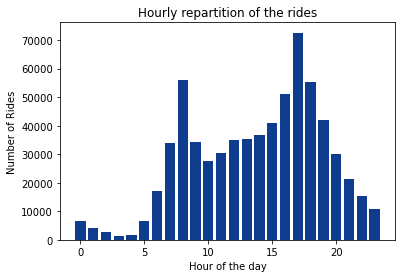

In [8]:
grouped_by_starthour_for_graph = data_start_hours.groupby("start_hour")[
    'month_start'].describe()
plt.bar(grouped_by_starthour_for_graph.index,
        grouped_by_starthour_for_graph["count"], color='#103c8e')
f = plt.gca()
f.axes.get_xaxis().set_visible(True)
plt.xlabel("Hour of the day")
plt.ylabel("Number of Rides")
plt.title("Hourly repartition of the rides")


With this graph and the previous table, we can see that the maximum number of rides is reached during rush hour around 5pm. There is also an other pick around 9am so we can safely say that the bikes are used by commuters


# Weekly repartition


In [9]:
data.groupby("dayofweek_start").describe()


dayofweek_end                                               \
                        count      mean       std  min  25%  50%  75%  max   
dayofweek_start                                                              
Friday                99960.0  4.008513  0.106218  0.0  4.0  4.0  4.0  6.0   
Monday                98610.0  0.007585  0.091652  0.0  0.0  0.0  0.0  4.0   
Saturday              82357.0  5.007759  0.159762  0.0  5.0  5.0  5.0  6.0   
Sunday                68975.0  5.938789  0.601580  0.0  6.0  6.0  6.0  6.0   
Thursday             106234.0  3.007032  0.087736  0.0  3.0  3.0  3.0  6.0   
Tuesday              105273.0  1.006203  0.081132  1.0  1.0  1.0  1.0  6.0   
Wednesday            107182.0  2.006662  0.084937  2.0  2.0  2.0  2.0  5.0   

                month_end            ...         duration                   \
                    count      mean  ...              75%              max   
dayofweek_start                      ...                                     
Friday            99960.0  6.857453  ...  0 days 00:17:00  4 days 23:45:00   
Monday            98610.0  6.749741  ...  0 days 00:17:00  4 days 16:22:00   
Saturday          82357.0  6.843802  ...  0 days 00:24:00  5 days 00:35:00   
Sunday            68975.0  7.022805  ...  0 days 00:24:00  4 days 07:56:00   
Thursday         106234.0  6.777228  ...  0 days 00:17:00  4 days 17:46:00   
Tuesday          105273.0  6.742726  ...  0 days 00:16:00  5 days 05:51:00   
Wednesday        107182.0  6.944020  ...  0 days 00:17:00  3 days 04:19:00   

                duration_minutes                                          \
                           count       mean         std   min  25%   50%   
dayofweek_start                                                            
Friday                   99960.0  20.600420   86.969987   1.0  7.0  11.0   
Monday                   98610.0  20.113386   76.458257   1.0  7.0  11.0   
Saturday                 82357.0  29.063455  110.828379   1.0  8.0  14.0   
Sunday                   68975.0  27.611743   92.297241 -54.0  8.0  13.0   
Thursday                106234.0  18.744056   70.821957   1.0  7.0  11.0   
Tuesday                 105273.0  18.431915   62.047018   1.0  7.0  11.0   
Wednesday               107182.0  18.147674   61.816211   1.0  7.0  11.0   

                               
                  75%     max  
dayofweek_start                
Friday           17.0  7185.0  
Monday           17.0  6742.0  
Saturday         24.0  7235.0  
Sunday           24.0  6236.0  
Thursday         17.0  6826.0  
Tuesday          16.0  7551.0  
Wednesday        17.0  4579.0  

[7 rows x 40 columns]

Text(0.5, 1.0, 'Rides per day of the week')

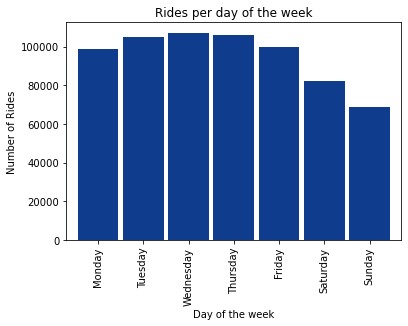

In [10]:
grouped_by_weekday = data.groupby(
    "dayofweek_start")['duration'].describe()
ax = grouped_by_weekday["count"].loc[day_order].plot(
    kind="bar", legend=False, color='#103c8e', width=0.9)
plt.xlabel("Day of the week")
plt.ylabel("Number of Rides")
plt.title("Rides per day of the week")


The rides ares mostly use during the week and there is less activity on the weekend


### average trip timing in a week

In [11]:
rData = data[["dayofweek_start", "start_hour"]]
mapping2 = {"Monday": 0, "Tuesday": 1, "Wednesday": 2,
            "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}
rData["dayofweek_start"] = rData["dayofweek_start"].replace(mapping2)
rData["hourOfWeekStart"] = rData["dayofweek_start"]*24+rData["start_hour"]
rData = rData.drop("start_hour", axis=1)
rData


dayofweek_start  hourOfWeekStart
0                     0                0
1                     0                0
2                     0                0
3                     0                1
4                     0                1
...                 ...              ...
671813                0               23
671814                0               23
671815                0               23
671816                0               23
671817                0               23

[668591 rows x 2 columns]

In [12]:
plotData=rData.groupby("hourOfWeekStart")["dayofweek_start"].count()

([<matplotlib.axis.XTick at 0x29f41ed84f0>,
 [Text(12, 0, 'Mon'),
  Text(36, 0, 'Tue'),
  Text(60, 0, 'Wed'),
  Text(84, 0, 'Thu'),
  Text(108, 0, 'Fri'),
  Text(132, 0, 'Sat'),
  Text(156, 0, 'Sun')])

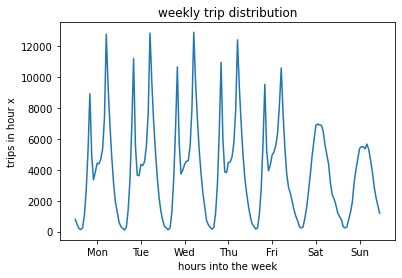

In [13]:
plt.plot(plotData)
plt.title("weekly trip distribution")
plt.xlabel("hours into the week")
plt.ylabel("trips in hour x")
plt.xticks([12, 36, 60, 84, 108, 132, 156], [
           "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])


This graph shows the peak demand times during a week. It can be seen that during the week, during rush hour, the amount of trips peak. 

Rush hours in the evening seem to have a higher demand than at morning. 

Outside of rush hour, the demand during the week is fairly low, even lower than on weekends. 

During weekends trips then to be more common around noon and not so common at morning or in the evening.

# Monthly Repartition


In [14]:
data.groupby("month_start").describe()


dayofweek_end                                               \
                    count      mean       std  min  25%  50%  75%  max   
month_start                                                              
Apr               51016.0  2.908480  1.976078  0.0  1.0  3.0  5.0  6.0   
Aug               79333.0  2.815940  1.827034  0.0  1.0  3.0  4.0  6.0   
Dec               31830.0  2.692868  1.931380  0.0  1.0  3.0  4.0  6.0   
Feb               34252.0  2.441551  1.795426  0.0  1.0  2.0  4.0  6.0   
Jan               28659.0  2.550403  1.864728  0.0  1.0  2.0  4.0  6.0   
Jul               81391.0  2.829723  2.026120  0.0  1.0  3.0  5.0  6.0   
Jun               77226.0  2.891863  1.880654  0.0  1.0  3.0  4.0  6.0   
Mar               35129.0  2.938968  1.961564  0.0  1.0  3.0  5.0  6.0   
May               71140.0  2.617304  1.829864  0.0  1.0  2.0  4.0  6.0   
Nov               42492.0  2.911019  1.909107  0.0  1.0  3.0  4.0  6.0   
Oct               68546.0  2.569063  1.893270  0.0  1.0  2.0  4.0  6.0   
Sep               67577.0  3.061115  1.900982  0.0  2.0  3.0  5.0  6.0   

            month_end             ...         duration                   \
                count       mean  ...              75%              max   
month_start                       ...                                     
Apr           51016.0   4.000118  ...  0 days 00:17:00  1 days 21:34:00   
Aug           79333.0   8.000265  ...  0 days 00:19:00  4 days 16:22:00   
Dec           31830.0  11.996890  ...  0 days 00:17:00  4 days 23:45:00   
Feb           34252.0   2.000175  ...  0 days 00:16:00  3 days 21:20:00   
Jan           28659.0   1.000035  ...  0 days 00:15:00  3 days 16:41:00   
Jul           81391.0   7.000405  ...  0 days 00:20:00  4 days 07:43:00   
Jun           77226.0   6.000298  ...  0 days 00:19:00  3 days 22:30:00   
Mar           35129.0   3.000256  ...  0 days 00:16:00  5 days 05:51:00   
May           71140.0   5.000211  ...  0 days 00:19:00  2 days 18:40:00   
Nov           42492.0  11.000447  ...  0 days 00:17:00  4 days 07:56:00   
Oct           68546.0  10.000233  ...  0 days 00:18:00  2 days 17:34:00   
Sep           67577.0   9.000340  ...  0 days 00:19:00  5 days 00:35:00   

            duration_minutes                                                \
                       count       mean         std   min  25%   50%   75%   
month_start                                                                  
Apr                  51016.0  18.180414   46.200504   1.0  7.0  11.0  17.0   
Aug                  79333.0  23.621620   97.366952   1.0  7.0  12.0  19.0   
Dec                  31830.0  22.333208  116.059348   1.0  7.0  10.0  17.0   
Feb                  34252.0  18.008291   63.260814   1.0  7.0  10.0  16.0   
Jan                  28659.0  19.222478   84.849137   1.0  7.0  10.0  15.0   
Jul                  81391.0  23.736126   84.396615   1.0  8.0  12.0  20.0   
Jun                  77226.0  20.018375   54.526691   1.0  8.0  12.0  19.0   
Mar                  35129.0  16.798628   64.278175   1.0  7.0  10.0  16.0   
May                  71140.0  19.646233   53.348768   1.0  8.0  12.0  19.0   
Nov                  42492.0  20.488657   88.737213 -54.0  7.0  11.0  17.0   
Oct                  68546.0  21.113150   75.492777   1.0  7.0  11.0  18.0   
Sep                  67577.0  25.955103  106.755268   1.0  7.0  12.0  19.0   

                     
                max  
month_start          
Apr          2734.0  
Aug          6742.0  
Dec          7185.0  
Feb          5600.0  
Jan          5321.0  
Jul          6223.0  
Jun          5670.0  
Mar          7551.0  
May          4000.0  
Nov          6236.0  
Oct          3934.0  
Sep          7235.0  

[12 rows x 40 columns]

Text(0.5, 1.0, 'Rides per Month')

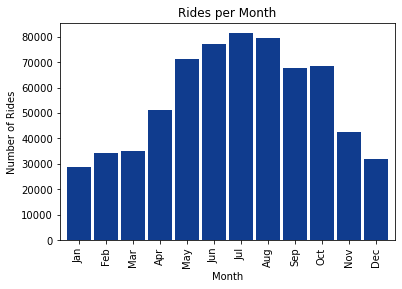

In [15]:
grouped_by_monthstart = data.groupby(
    "month_start")['dayofweek_start'].describe()
ax = grouped_by_monthstart["count"].loc[month_order].plot(
    kind="bar", legend=False, color='#103c8e', width=0.9)
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Rides per Month")


Bike rides are more popular during summer months as in winter months


# Trip durations depending on temporal aspects


In [16]:
data_duration = data[["dayofweek_start",
                      "month_start", "start_hour", "duration_minutes"]]
data_duration


dayofweek_start month_start  start_hour  duration_minutes
0               Monday         Jan           0              18.0
1               Monday         Jan           0             572.0
2               Monday         Jan           0              22.0
3               Monday         Jan           1              21.0
4               Monday         Jan           1               4.0
...                ...         ...         ...               ...
671813          Monday         Dec          23              46.0
671814          Monday         Dec          23              41.0
671815          Monday         Dec          23             438.0
671816          Monday         Dec          23              14.0
671817          Monday         Dec          23              10.0

[668591 rows x 4 columns]

### Trip Length by starting hour


Text(0.5, 1.0, 'Average ride duration by starting hour')

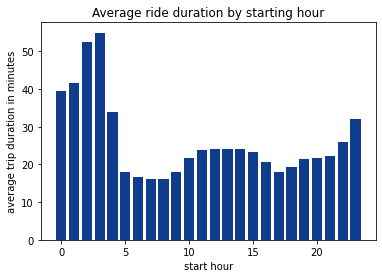

In [17]:
grouped_by_hour = data.groupby("start_hour")['duration_minutes'].describe()
plt.bar(grouped_by_hour.index, grouped_by_hour["mean"], color='#103c8e')
f = plt.gca()
f.axes.get_xaxis().set_visible(True)
plt.xlabel("start hour")
plt.ylabel("average trip duration in minutes")
plt.title("Average ride duration by starting hour")


bike rides are shortest during rush hours. Overnight trips are on average much longer, presumably because users rent the bikes over night instead of only for a short trip.


### Trip Length per day of week


In [18]:
grouped_by_weekday = data.groupby("dayofweek_start")[
    'duration_minutes'].describe()
ax = grouped_by_weekday["mean"].loc[day_order].plot(
    kind="bar", legend=False, color='#103c8e', width=0.9)
plt.xlabel("day of week")
plt.ylabel("average trip duration in minutes")
plt.title("Average ride duration by day of week")


Text(0.5, 1.0, 'Average ride duration by day of week')

biker rides on weekends are on average much longer than rides on weekdays. This is because short commute trips are not common on weekends, which increases the average ride duration.


### Trip Length per month


Text(0.5, 1.0, 'Average ride duration per month')

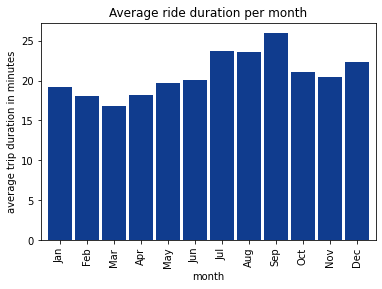

In [19]:
grouped_by_monthstart = data.groupby(
    "month_start")['duration_minutes'].describe()
ax = grouped_by_monthstart["mean"].loc[month_order].plot(
    kind="bar", legend=False, color='#103c8e', width=0.9)
plt.xlabel("month")
plt.ylabel("average trip duration in minutes")
plt.title("Average ride duration per month")


trips are longer on average in the warmer months. This might be because joyrides, which are usually longer, will not be as common when the weather is bad.
